# Read TCGA data

In [ ]:
#### read TCGA_COAD data ####
COAD_UCSC_Toil_tpm_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/UCSC_Toil/COAD_UCSC_Toil_tpm_dataset.rds")
COAD_RSEM_gene_tpm <- COAD_UCSC_Toil_tpm_dataset$COAD.RSEM.gene.tpm
gencode.v23.annotation <- COAD_UCSC_Toil_tpm_dataset$gencode.v23.annotation
COAD.pheno <- COAD_UCSC_Toil_tpm_dataset$COAD.pheno
head(gencode.v23.annotation)
## convert ensembleID to symbol 
geneMatch <- match(rownames(COAD_RSEM_gene_tpm),gencode.v23.annotation$V1)
geneSymbol <- as.character(gencode.v23.annotation[geneMatch,]$V2)
COAD_tpm_symbol <- COAD_RSEM_gene_tpm
rownames(COAD_tpm_symbol) <- geneSymbol
head(COAD_tpm_symbol)

### Phenotype Update
### Seperate the Normal and Tumor samples
sampleID<- as.character(COAD.pheno$sample)
table(unlist(lapply(strsplit(sampleID,"-"), '[[', 4)))
sampleTypes <- unlist(lapply(strsplit(sampleID,"-"), '[[', 4))
sampleTypes[sampleTypes=="01"]<- "Tumor"
sampleTypes[sampleTypes=="11"]<- "Nomal"
COAD.pheno <- cbind(COAD.pheno , sampleTypes)

In [4]:
## Read scReference 
#### Reading data
### 1.Read the reference scRNA data
###
scReference.V1 <- readRDS("/data8t_4/JH/MyJobs/Normal_cell_reference/Step2_Merge_and_Filter_the_scReference/2019_11_16_scReference.V1.rds")
scReference.list <- scReference.V1$scReference.list

In [11]:
### 2.Reference data transformation
#### Reference transformation 
#### log10(x+1) transformed the same as COAD data
log10.scReference.list.CV.8000 <- lapply(scReference.V1[["scReference.list.CV.8000"]], function(x){
  log10.x <- log10(x+1)
  return(log10.x)
})

log10.scReference.list.CV.4000 <- lapply(scReference.V1[["scReference.list.CV.4000"]], function(x){
  log10.x <- log10(x+1)
  return(log10.x)
})
log10.scReference.list.CV.2000 <- lapply(scReference.V1[["scReference.list.CV.2000"]], function(x){
  log10.x <- log10(x+1)
  return(log10.x)
})

log10.scReference.list.CV.1500 <- lapply(scReference.V1[["scReference.list.CV.1500"]], function(x){
  log10.x <- log10(x+1)
  return(log10.x)
})

log10.scReference.list.CV.1000 <- lapply(scReference.V1[["scReference.list.CV.1000"]], function(x){
  log10.x <- log10(x+1)
  return(log10.x)
})

In [10]:
head(log10.scReference.list.CV.8000$Tang.Adult.colon)

,Adult_Goblet_1,Adult_Enter_2,Adult_Enter_3,Adult_Goblet_2,Adult_Enter_1,Adult_MKI67_High,Adult_Endocrine,Adult_Mesenchymal,Adult_Immune,Adult_OLFM4_High
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ANKRD66,0,0,0.00000000,0.0000000,0,0,0,0.0000000,1.354354,0
AQP2,0,0,0.00000000,0.0000000,0,0,0,0.0000000,1.435269,0
ART4,0,0,0.00000000,0.0000000,0,0,0,0.5465857,0.000000,0
BSND,0,0,0.00871810,0.0000000,0,0,0,0.0000000,0.000000,0
C11orf88,0,0,0.00000000,0.1702617,0,0,0,0.0000000,0.000000,0
C15orf56,0,0,0.09425525,0.0000000,0,0,0,0.0000000,0.000000,0


In [12]:
### Distance calculation
##### Distance calculation 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/refCorMerge.R")
### 
##### Transform COAD data
summary(colSums(COAD_tpm_symbol)) ### So its not log2 transformed
# Expression data transformation Log(2+0.001)
Log10.expList <- list(COAD_tpm_symbol = log10(COAD_tpm_symbol+1))
Cor.Res.CV8000 <- refCorMerge(Log10.expList, log10.scReference.list.CV.8000)
Cor.Res.CV4000 <- refCorMerge(Log10.expList, log10.scReference.list.CV.4000)
Cor.Res.CV2000 <- refCorMerge(Log10.expList, log10.scReference.list.CV.2000)
Cor.Res.CV1500 <- refCorMerge(Log10.expList, log10.scReference.list.CV.1500)
Cor.Res.CV1000 <- refCorMerge(Log10.expList, log10.scReference.list.CV.1000)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1e+06   1e+06   1e+06   1e+06   1e+06   1e+06 

[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"


In [ ]:
summary(Cor.Res.CV8000$Cor.merged)

In [ ]:
## skeep the normalization step

In [ ]:
summary(Cor.Res.CV1500$Cor.merged)

In [ ]:
### only tumor samples
TumorID <- rownames(COAD.pheno[COAD.pheno$sampleTypes == "Tumor",])
TumorID
#### Cluster using SC3
### Step1.Load script

In [46]:
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
### Step2.Convert NA in matrix to 0
Cor.tumor <- Cor.Res.CV8000$Cor.merged
Cor.tumor<- Cor.tumor[,TumorID]

In [47]:
#Cor.tumor[is.na(Cor.Norm)] <-0
#colnames(Cor.tumor)[colSums(is.na(Cor.tumor)) > 0]
#colnames(COAD.pheno)
Pheno.merged.tumor <- COAD.pheno[TumorID,c("sampleTypes","ajcc_pathologic_tumor_stage","histological_type")]

In [48]:
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hc1500Tumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


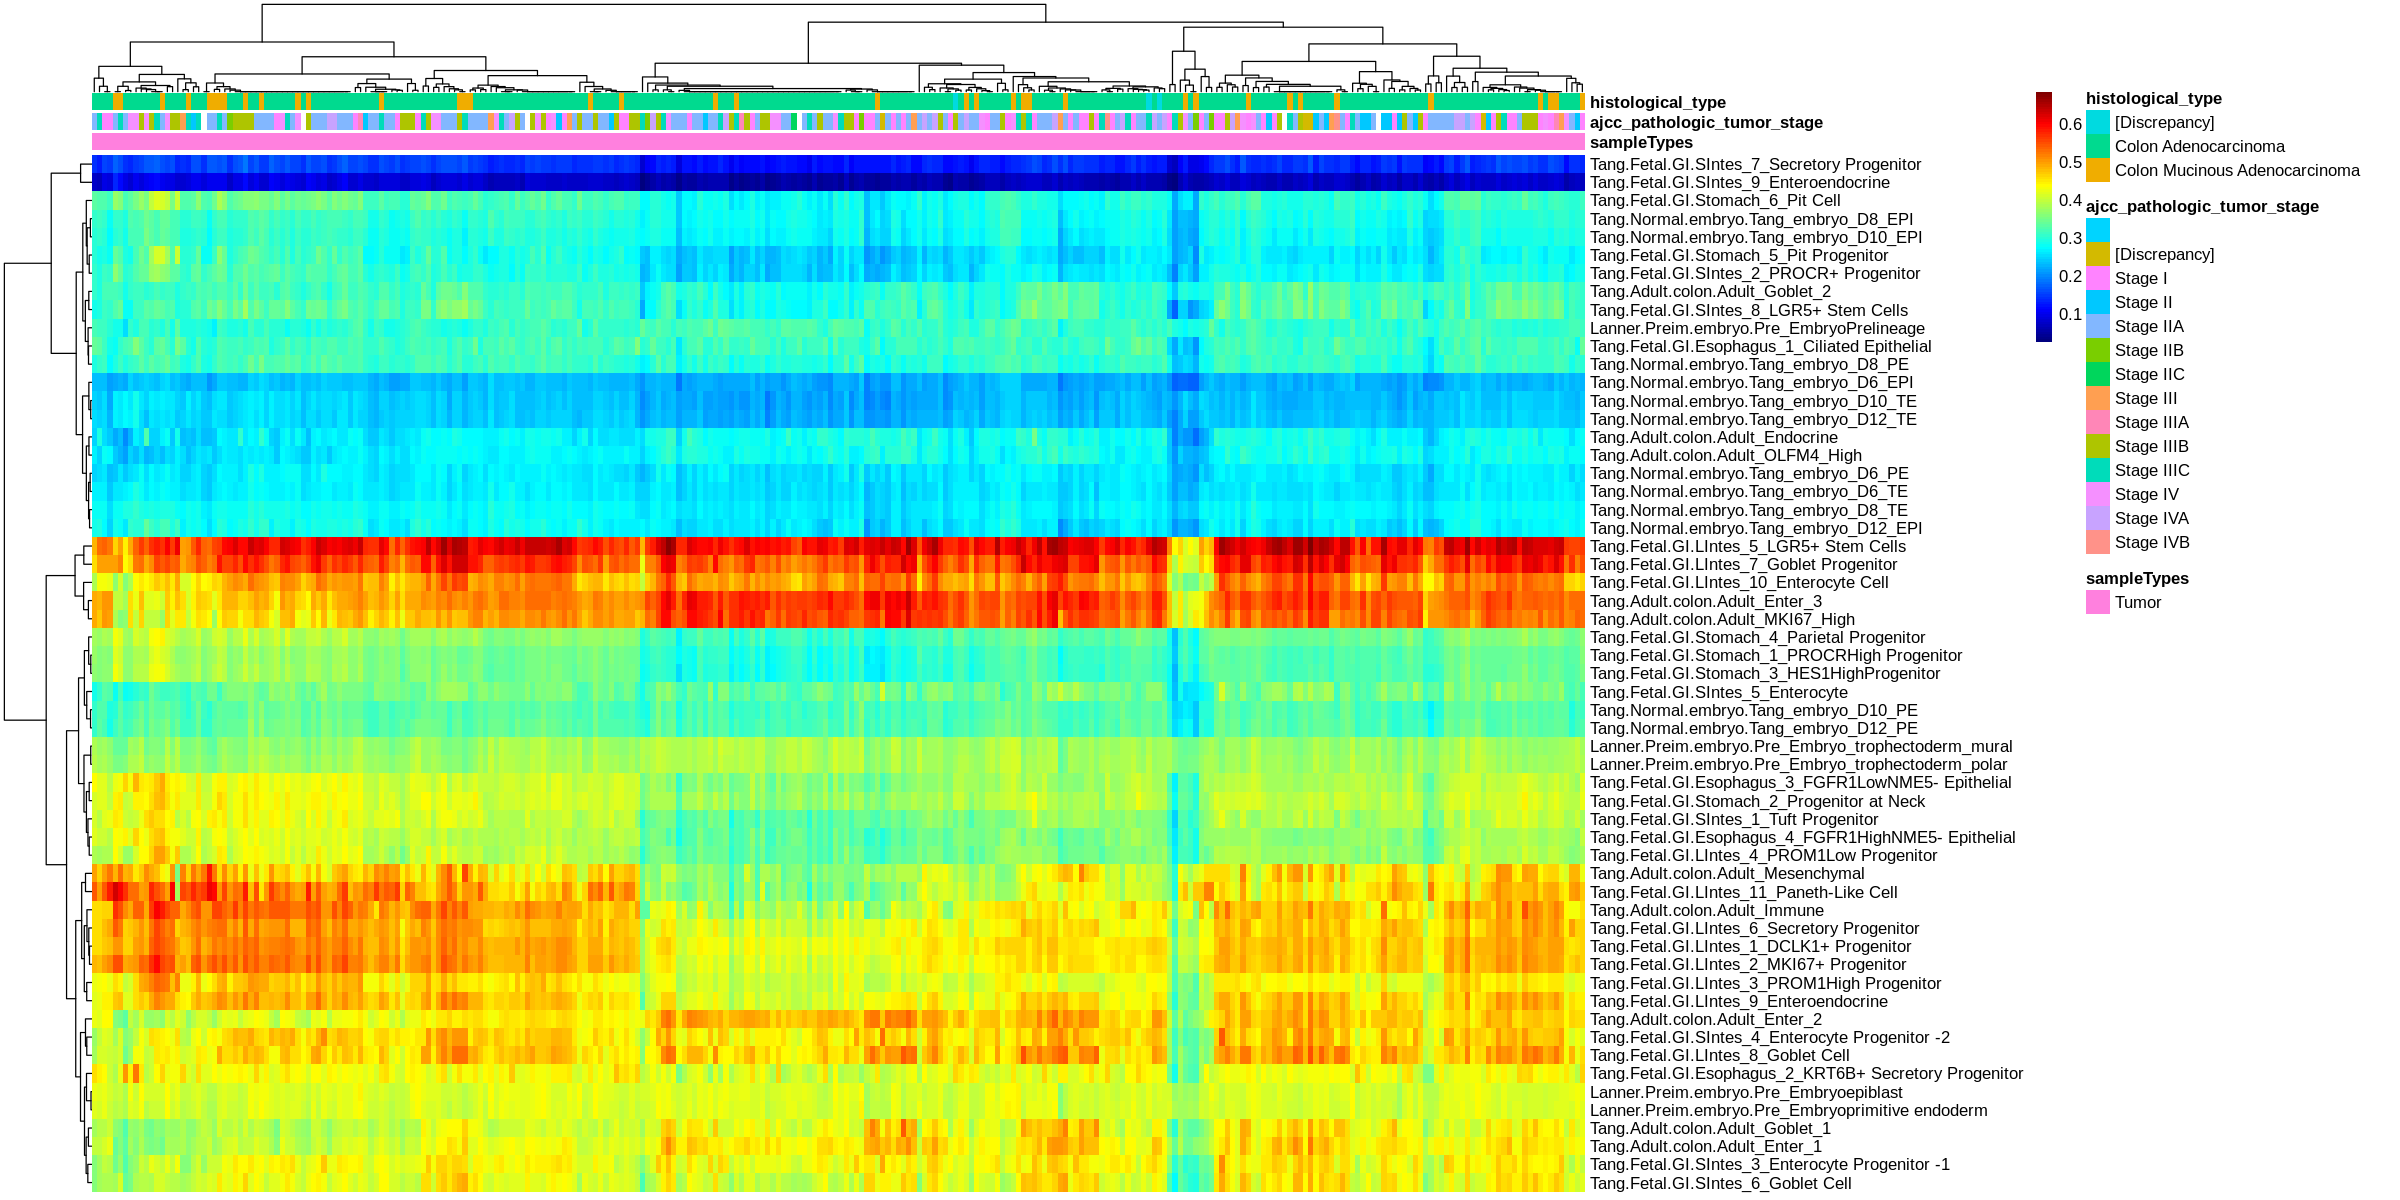

In [49]:
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hc1500Tumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


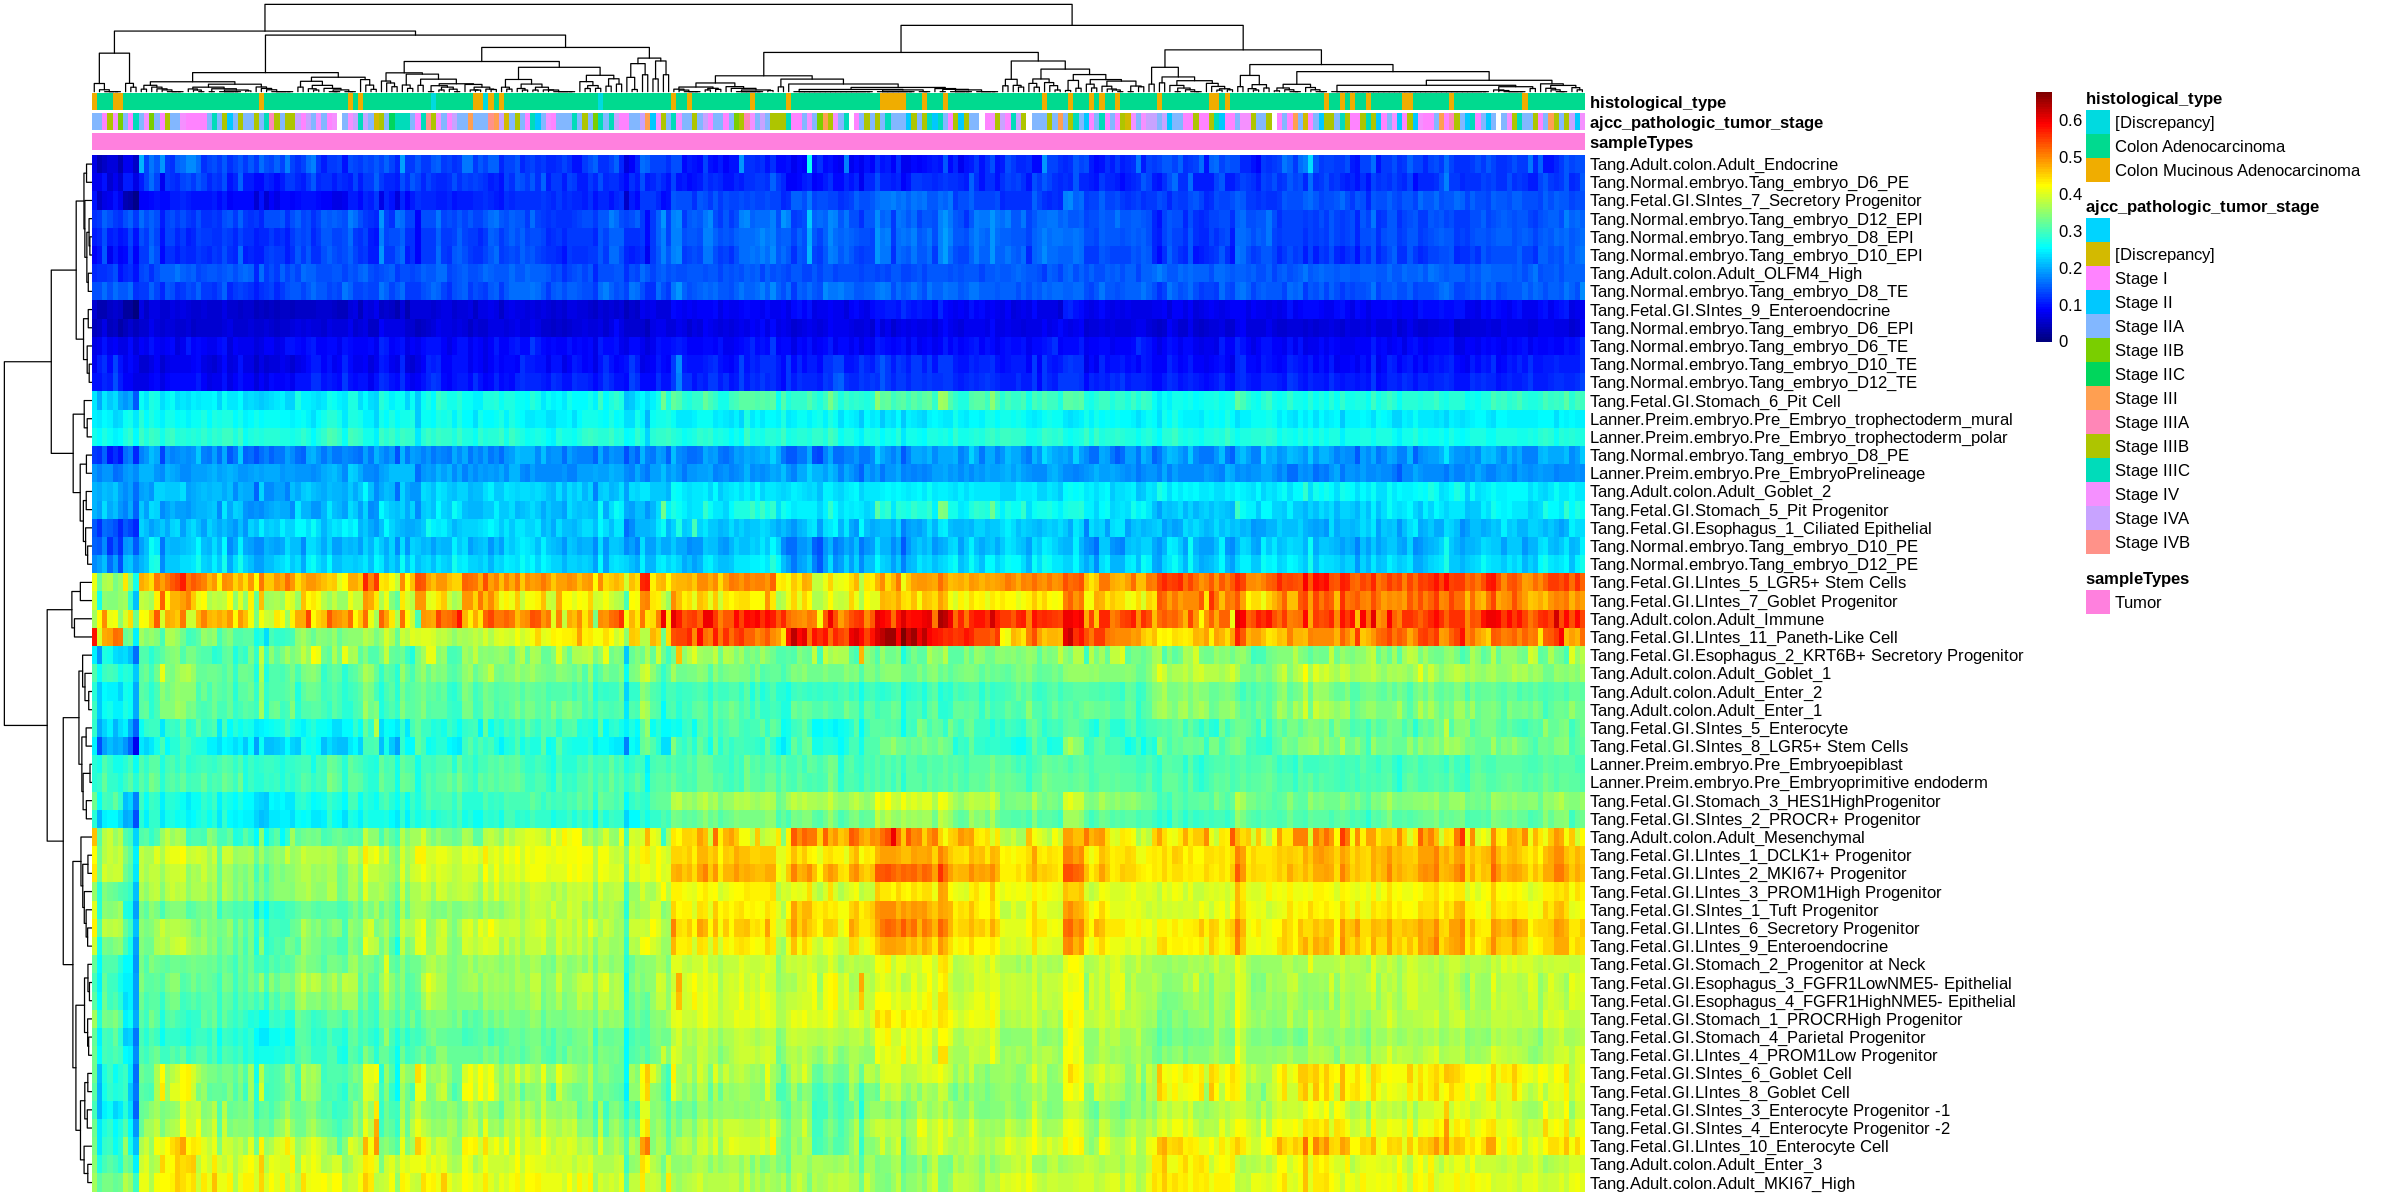

In [50]:
## cv4000 

source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
### Step2.Convert NA in matrix to 0
Cor.tumor <- Cor.Res.CV4000$Cor.merged
Cor.tumor<- Cor.tumor[,TumorID]
Pheno.merged.tumor <- COAD.pheno[TumorID,c("sampleTypes","ajcc_pathologic_tumor_stage","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


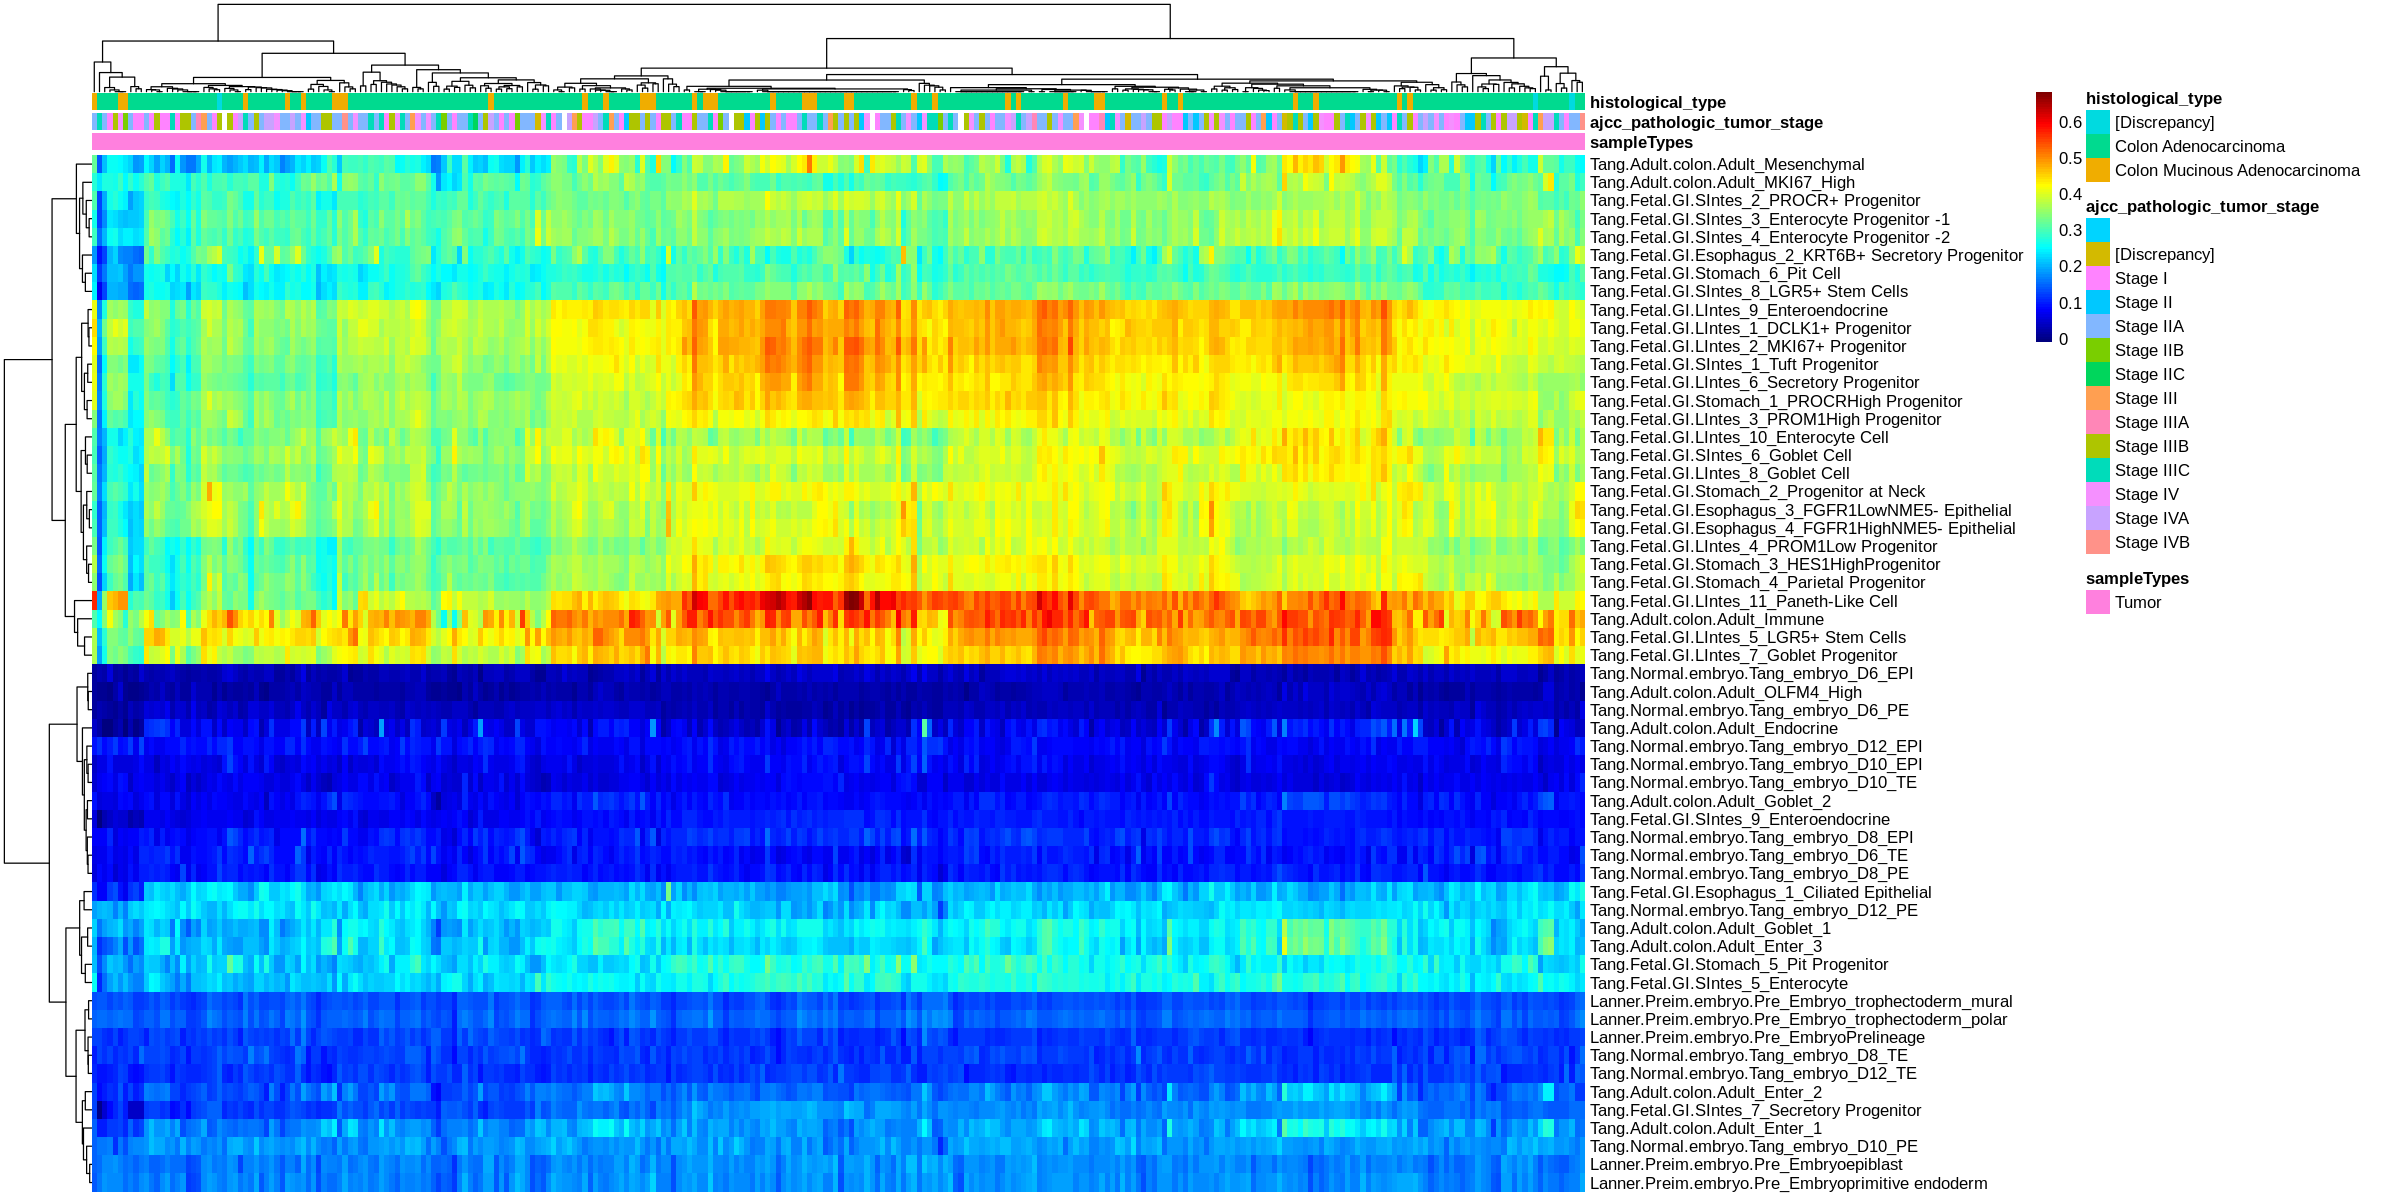

In [51]:
## cv2000 

source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
### Step2.Convert NA in matrix to 0
Cor.tumor <- Cor.Res.CV2000$Cor.merged
Cor.tumor<- Cor.tumor[,TumorID]
Pheno.merged.tumor <- COAD.pheno[TumorID,c("sampleTypes","ajcc_pathologic_tumor_stage","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


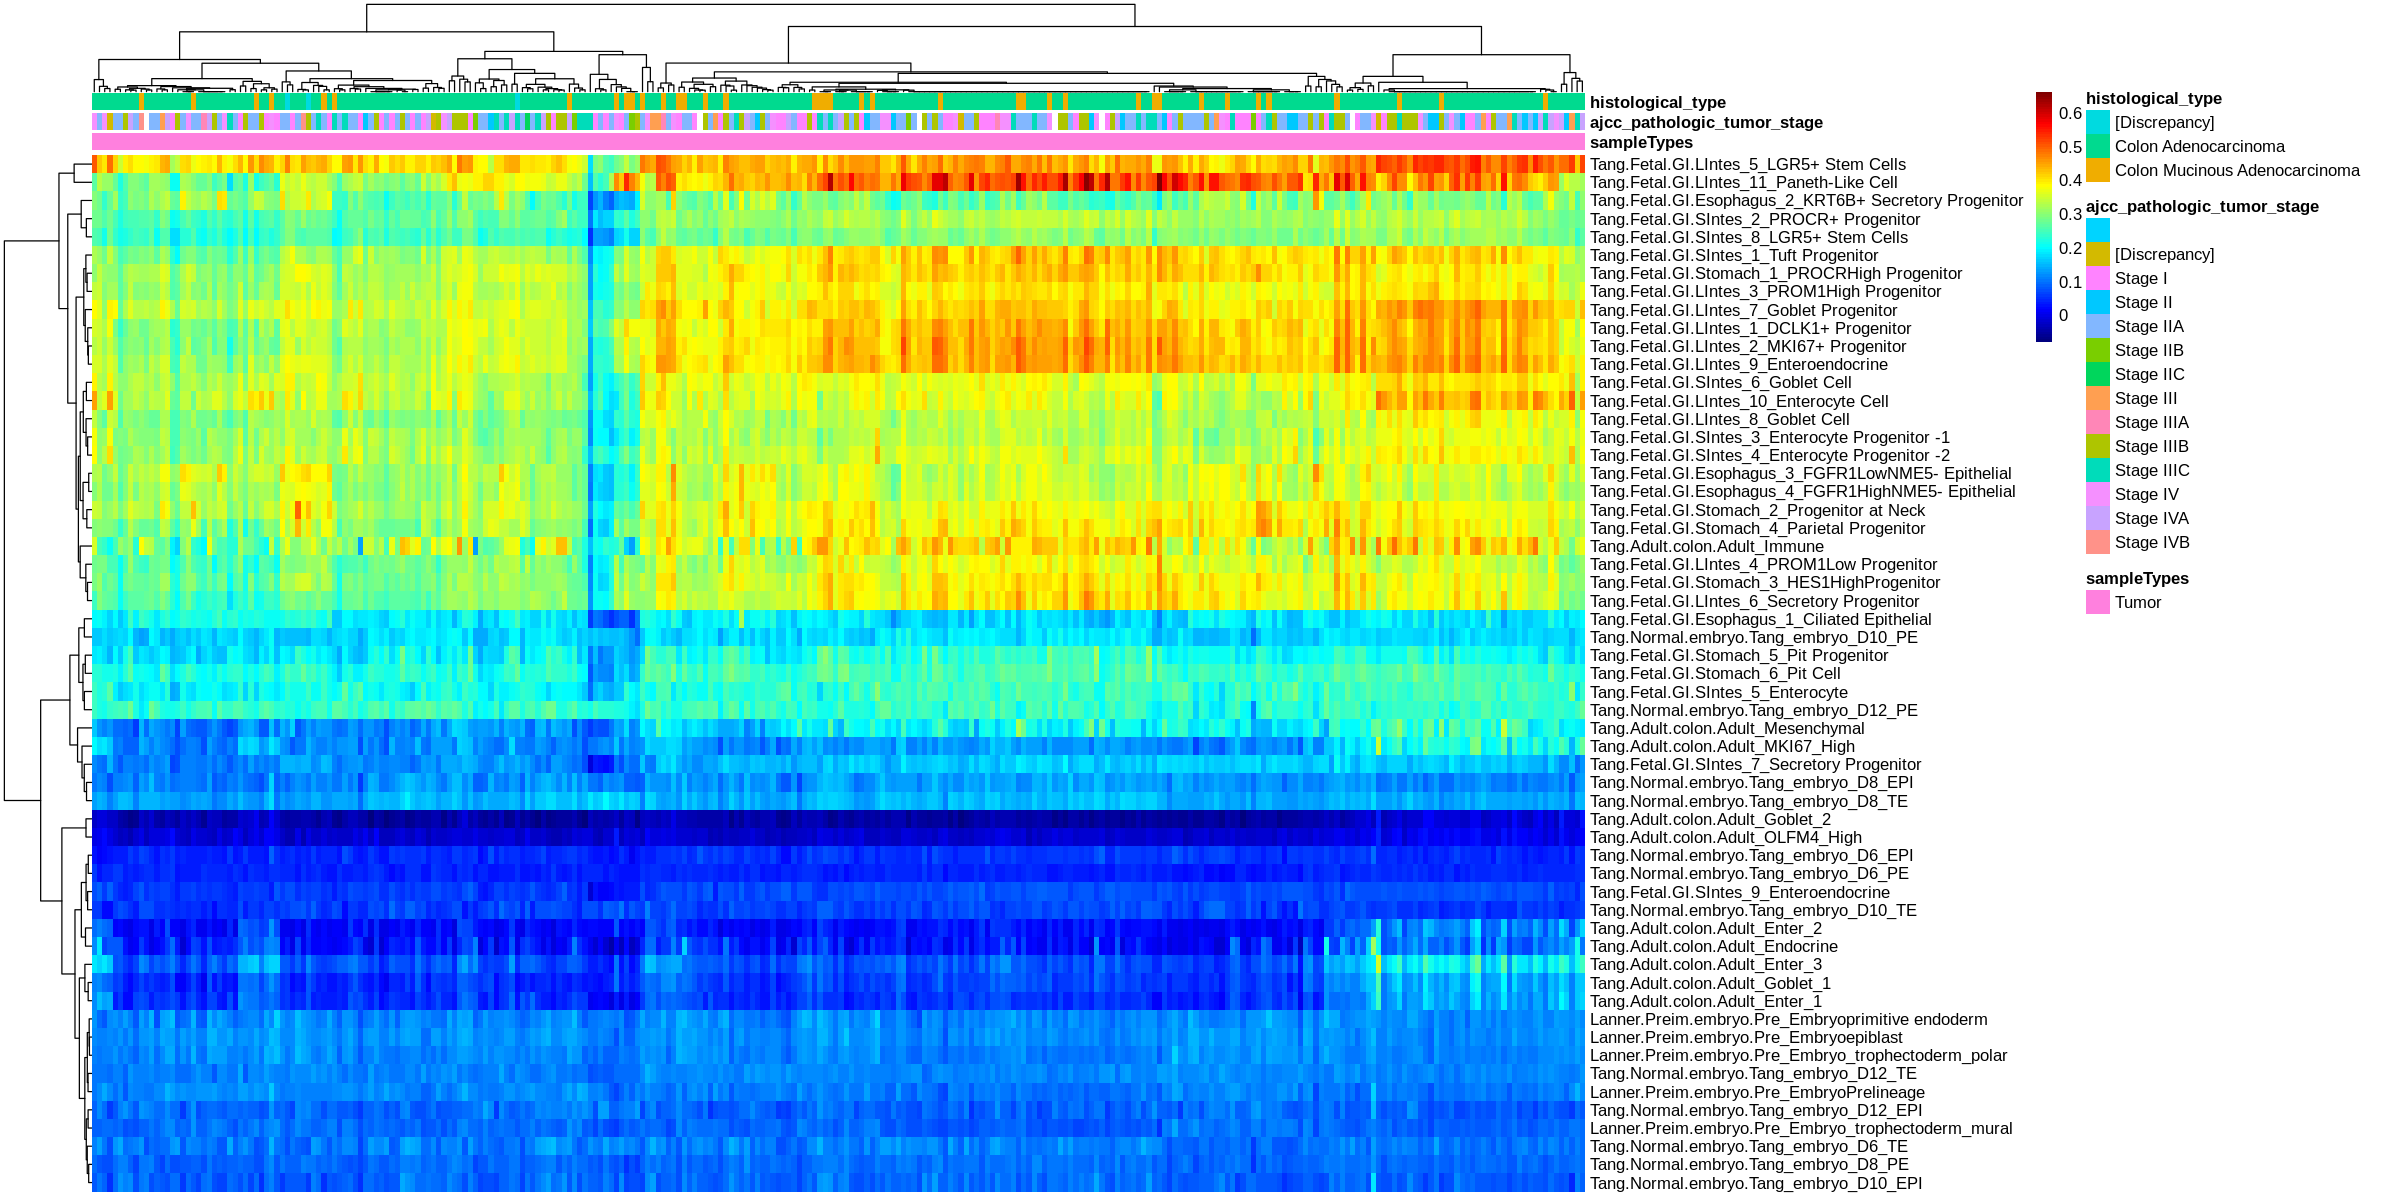

In [52]:
## cv15000 

source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
### Step2.Convert NA in matrix to 0
Cor.tumor <- Cor.Res.CV1500$Cor.merged
Cor.tumor<- Cor.tumor[,TumorID]
Pheno.merged.tumor <- COAD.pheno[TumorID,c("sampleTypes","ajcc_pathologic_tumor_stage","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


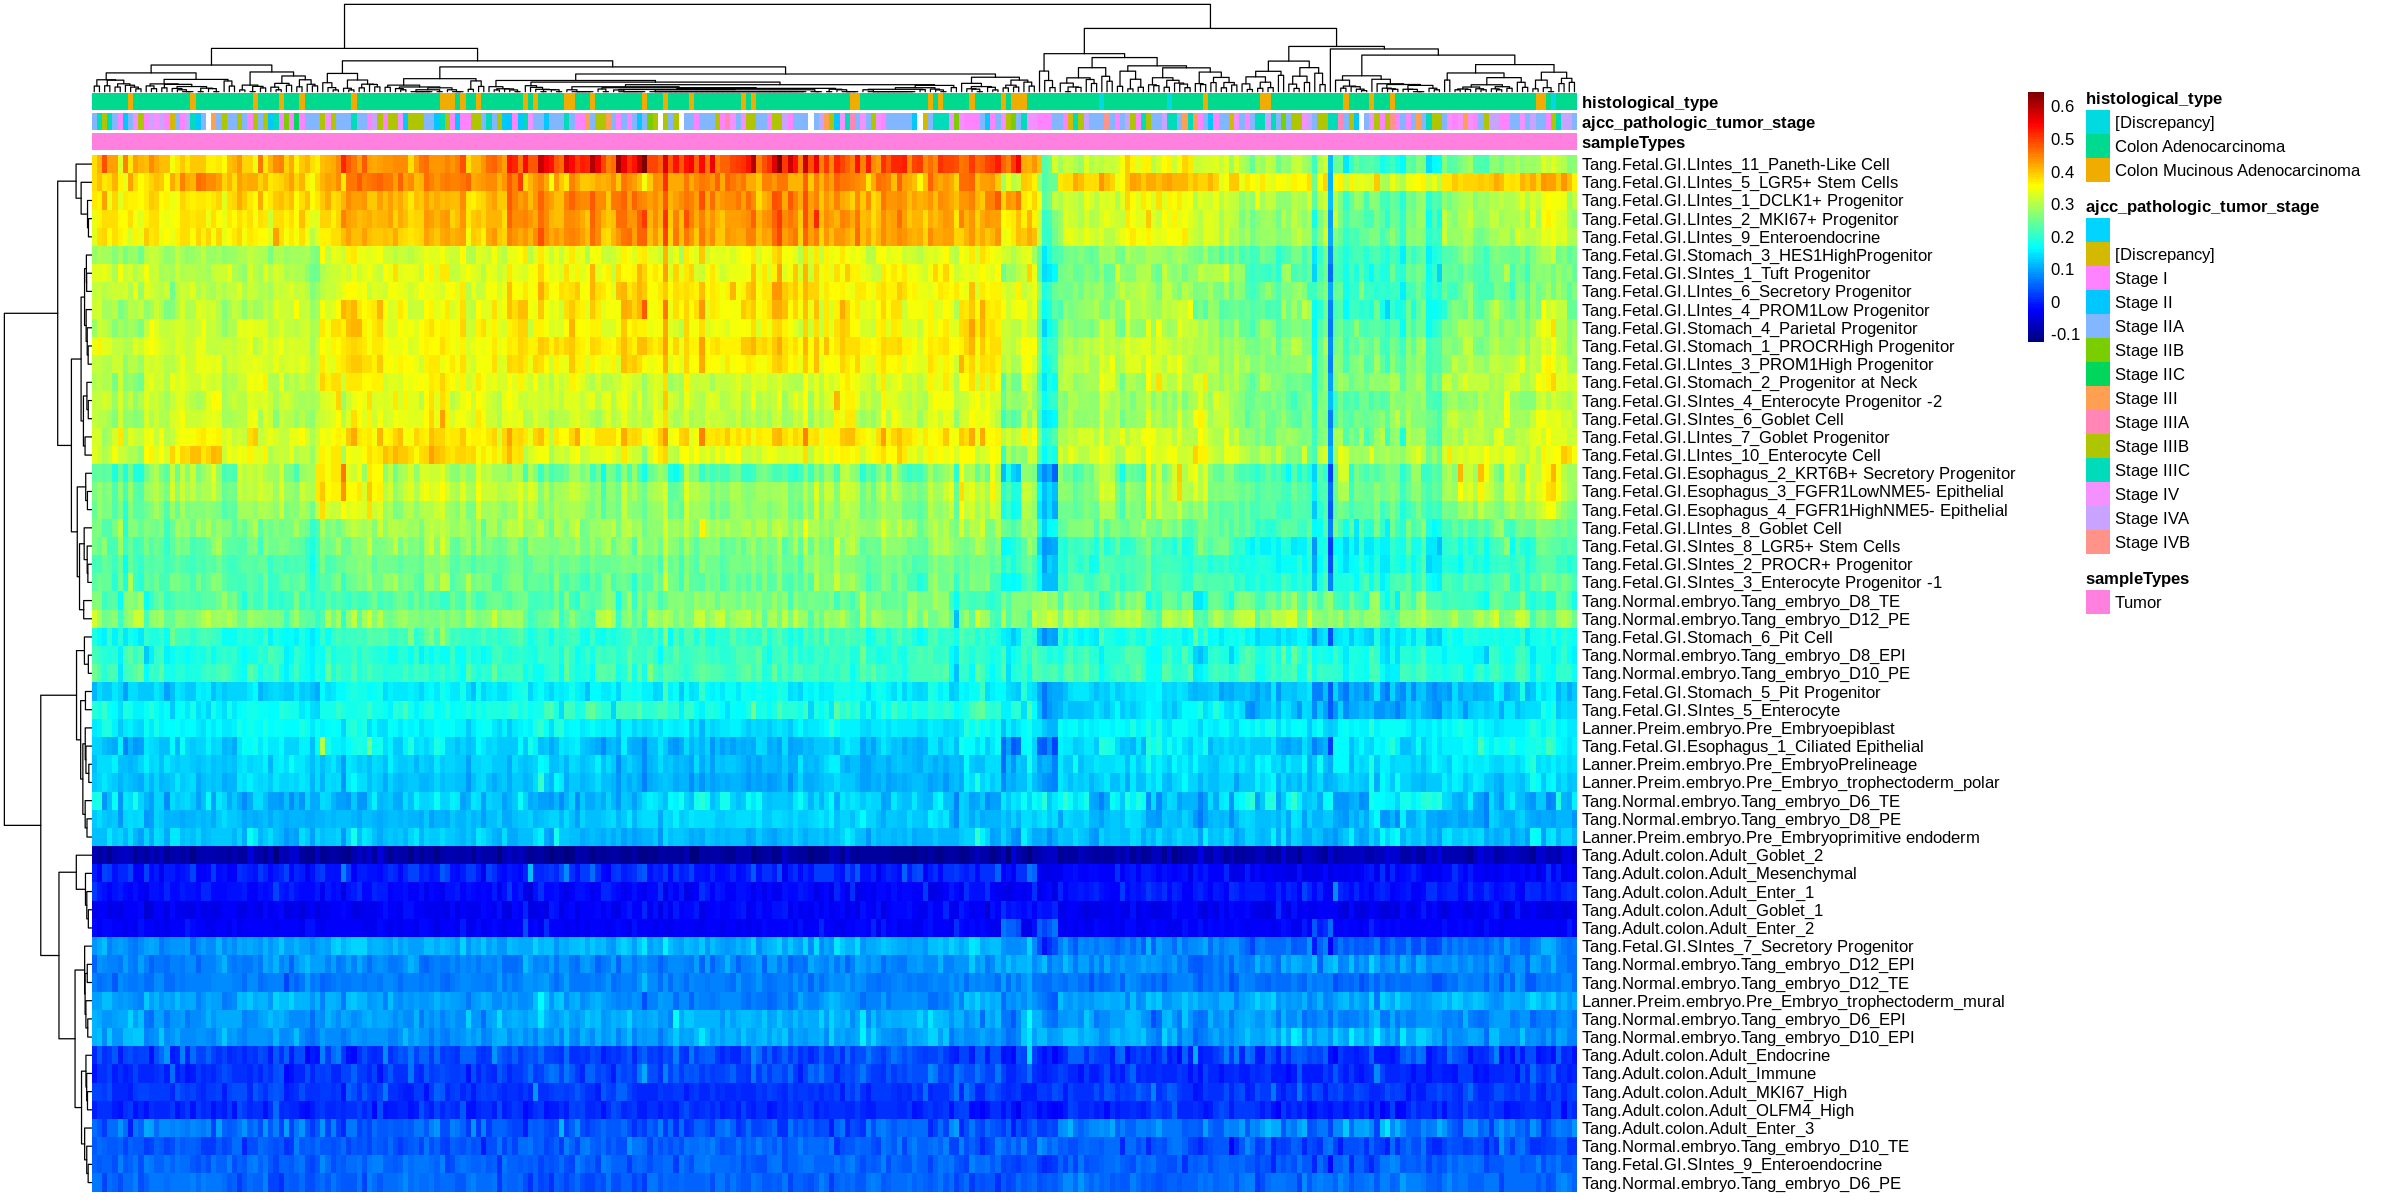

In [53]:
## cv1000 

source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
### Step2.Convert NA in matrix to 0
Cor.tumor <- Cor.Res.CV1000$Cor.merged
Cor.tumor<- Cor.tumor[,TumorID]
Pheno.merged.tumor <- COAD.pheno[TumorID,c("sampleTypes","ajcc_pathologic_tumor_stage","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)